Skipping preprocessed_data.csv due to error: Error loading: [Errno 2] No such file or directory: 'preprocessed_data.csv'


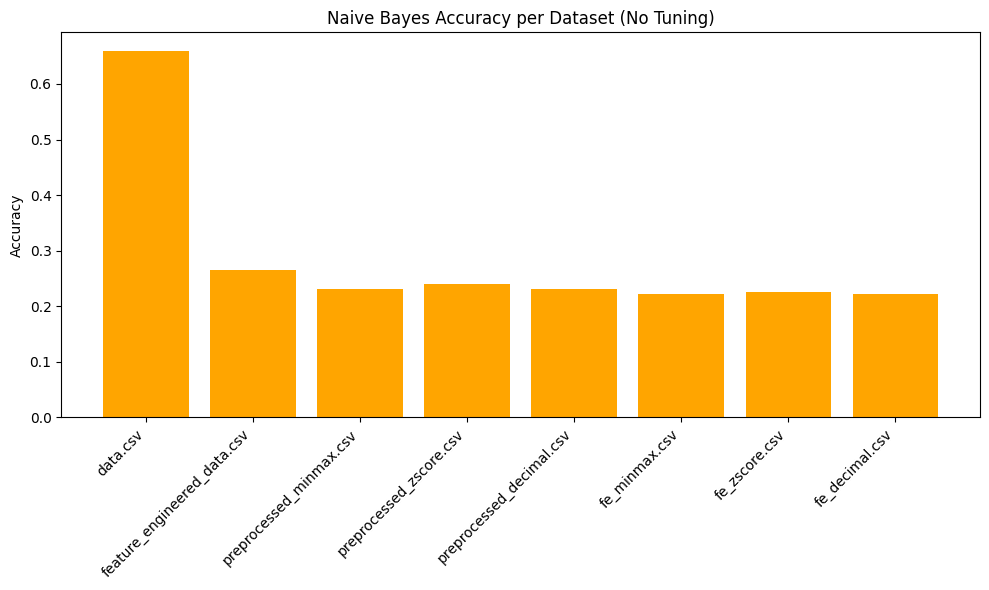


✅ Results saved to: output_NB/naive_bayes_results.csv
✅ Plot saved to: output_NB/naive_bayes_accuracy_plot.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# List of dataset paths
file_paths = [
    "data.csv",
    "preprocessed_data.csv",
    "feature_engineered_data.csv",
    "preprocessed_minmax.csv",
    "preprocessed_zscore.csv",
    "preprocessed_decimal.csv",
    "fe_minmax.csv",
    "fe_zscore.csv",
    "fe_decimal.csv"
]

datasets = {}
for path in file_paths:
    try:
        filename = os.path.basename(path)

        # Load with correct delimiter
        if filename == "data.csv":
            df = pd.read_csv(path, delimiter=';')
        else:
            df = pd.read_csv(path)

        datasets[filename] = df
    except Exception as e:
        datasets[filename] = f"Error loading: {str(e)}"

results = []

# Evaluate Naive Bayes on each dataset
for name, df in datasets.items():
    if isinstance(df, str):
        print(f"Skipping {name} due to error: {df}")
        continue

    try:
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]

        # Drop rows with missing values
        mask = X.notnull().all(axis=1)
        X = X[mask]
        y = y[mask.values]

        # Encode labels if needed
        if y.dtype == 'O':
            y = LabelEncoder().fit_transform(y)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )

        model = GaussianNB()
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))

        results.append({
            "Dataset": name,
            "Accuracy": acc
        })

    except Exception as e:
        results.append({
            "Dataset": name,
            "Accuracy": "Error"
        })

# Create output directory
output_dir = "output_NB"
os.makedirs(output_dir, exist_ok=True)

# Create DataFrame and clean it
results_df = pd.DataFrame(results)
results_df["Accuracy"] = pd.to_numeric(results_df["Accuracy"], errors="coerce")
plot_data = results_df.dropna(subset=["Accuracy"])

# Save CSV
results_path = os.path.join(output_dir, "naive_bayes_results.csv")
plot_data.to_csv(results_path, index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(plot_data["Dataset"], plot_data["Accuracy"], color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy per Dataset (No Tuning)")
plt.tight_layout()

# Save plot
plot_path = os.path.join(output_dir, "naive_bayes_accuracy_plot.png")
plt.savefig(plot_path)
plt.show()

print(f"\n✅ Results saved to: {results_path}")
print(f"✅ Plot saved to: {plot_path}")
